In [32]:
folder = "/home/yad2/sarpixeltracking/reference_20100621_tiled__secondary_20110802_tiled_vmap_minm_35px_spm2"

import os
from glob import glob


In [53]:
import cartopy.crs as ccrs

from osgeo import gdal, osr

gdal.UseExceptions()


import numpy as np

from pygeotools.lib import iolib, warplib

from glob import glob



vmap_dir = glob("reference*vmap*")[0]

ds = iolib.fn_getds(vmap_dir+"/vmap-F.tif")

ds_reproj = gdal.Warp('', ds, dstSRS='EPSG:8088', format='VRT')

dX_pix_array, dY_pix_array, good_pixels = ds_reproj.ReadAsArray()

gt = ds_reproj.GetGeoTransform()

tif_projection = ccrs.epsg(8088)

tif_extent = (gt[0], gt[0] + ds_reproj.RasterXSize * gt[1],
          gt[3] + ds_reproj.RasterYSize * gt[5], gt[3])

print(tif_projection)

print(tif_extent)


ds=None

ds = iolib.fn_getds(vmap_dir+"/vmap-dx.tif")

ds_reproj = gdal.Warp('', ds, dstSRS='EPSG:8088', format='VRT')

dX_m_array = ds_reproj.ReadAsArray()

ds=None

ds = iolib.fn_getds(vmap_dir+"/vmap-dy.tif")

ds_reproj = gdal.Warp('', ds, dstSRS='EPSG:8088', format='VRT')

dY_m_array = ds_reproj.ReadAsArray()

ds=None

ds = iolib.fn_getds("reference_tif/reference.tif")

ds_reproj = gdal.Warp('', ds, dstSRS='EPSG:8088', format='VRT')

reference_array = ds_reproj.ReadAsArray()

ds=None

ds = iolib.fn_getds("coreg_secondary_tif/secondary.tif")

ds_reproj = gdal.Warp('', ds, dstSRS='EPSG:8088', format='VRT')

secondary_array = ds_reproj.ReadAsArray()

ds=None


# fname = F_file

# ds = gdal.Open("/home/yad2/sarpixeltracking/geometry_tif/lat.tif")
# lat_data = ds.GetRasterBand(1).ReadAsArray()
# ds=None


# fname="/home/yad2/sarpixeltracking/geometry_tif/lon.tif"

# # fname = F_file

# ds = gdal.Open(fname)
# lon_data = ds.GetRasterBand(1).ReadAsArray()
# ds=None

# gt = ds.GetGeoTransform()
# proj = ds.GetProjection()

# inproj = osr.SpatialReference()
# inproj.ImportFromWkt(proj)

# if str(inproj).startswith("PROJCS"):
#     projcs = inproj.GetAuthorityCode('PROJCS')
# elif str(inproj).startswith("GEOGCS"):
#     projcs = inproj.GetAuthorityCode('GEOGCS')

# print(projcs)
# file_projection = ccrs.epsg(projcs)
# print(file_projection)

# file_extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
#           gt[3] + ds.RasterYSize * gt[5], gt[3])



PROJCRS["ISN2016 / Lambert 2016",BASEGEOGCRS["ISN2016",DATUM["Islands Net 2016",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",8086]],CONVERSION["Iceland Lambert 2016",METHOD["Lambert Conic Conformal (2SP)",ID["EPSG",9802]],PARAMETER["Latitude of false origin",65,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8821]],PARAMETER["Longitude of false origin",-19,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8822]],PARAMETER["Latitude of 1st standard parallel",64.25,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8823]],PARAMETER["Latitude of 2nd standard parallel",65.75,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8824]],PARAMETER["Easting at false origin",2700000,LENGTHUNIT["metre",1],ID["EPSG",8826]],PARAMETER["Northing at false origin",300000,LENGTHUNIT["metre",1],ID["EPSG",8827]]],CS[Cartesian,2],AXIS["easting (X)",east,ORDER[1],LENGTHUNIT["metre",1]],AXIS["northing (Y)",north,ORDER[2],L

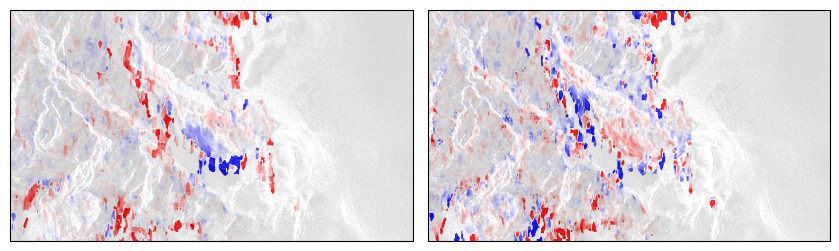

In [54]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import matplotlib.patheffects as path_effects


# plt.rc('font', family='Helvetica')



Skriða_extent = [-19.28, -19.41, 63.637, 63.67]


projection = ccrs.Mercator()

fig = figure(figsize=(8.5,10))

#####

fr = fig.add_subplot(1,2,1, projection=tif_projection)

fr.set_extent(Skriða_extent)

# fr.add_wms(wms='https://gis.lmi.is/geoserver/wms?request=GetCapabilities&service=WMS',
#                layers=["IS_50V:strandlina_flakar", 'IS_50V:vatnafar_flakar']) #"IS_50V:vatnafar_linur" 'IS_50V:samgongur_linur'

# gl = fr.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

# gl.top_labels = False
# gl.right_labels = False
# gl.xlines = False
# gl.ylines = False

fr.imshow(reference_array[:, :], cmap='gray', vmax=300, vmin=0, extent=tif_extent,
          origin='upper', transform=tif_projection)

fr.imshow(dX_m_array[:, :], cmap='bwr', vmax=20, vmin=-20, extent=tif_extent, alpha=0.8,
          origin='upper', transform=tif_projection)

####

fr2 = fig.add_subplot(1,2,2, projection=tif_projection)

fr2.set_extent(Skriða_extent)

# fr.add_wms(wms='https://gis.lmi.is/geoserver/wms?request=GetCapabilities&service=WMS',
#                layers=["IS_50V:strandlina_flakar", 'IS_50V:vatnafar_flakar']) #"IS_50V:vatnafar_linur" 'IS_50V:samgongur_linur'

# gl = fr2.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

# gl.top_labels = False
# gl.right_labels = False
# gl.xlines = False
# gl.ylines = False

fr2.imshow(reference_array[:, :], cmap='gray', vmax=300, vmin=0, extent=tif_extent,
          origin='upper', transform=tif_projection)

fr2.imshow(dY_m_array[:, :], cmap='bwr', vmax=20, vmin=-20, extent=tif_extent, alpha=0.8,
          origin='upper', transform=tif_projection)

####
fig.tight_layout()

# fig.savefig("TungKvJokull_OverviewFigure.png", dpi=300, bbox_inches='tight')

plt.show()


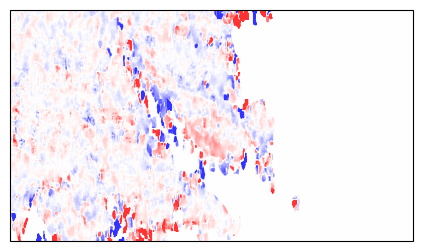

In [57]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import matplotlib.patheffects as path_effects


# plt.rc('font', family='Helvetica')



Skriða_extent = [-19.28, -19.41, 63.637, 63.67]


projection = ccrs.Mercator()

fig = figure(figsize=(8.5,10))

#####

fr = fig.add_subplot(1,2,1, projection=tif_projection)

fr.set_extent(Skriða_extent)



# fr.imshow(secondary_array[:, :], cmap='gray', vmax=500, vmin=0, extent=tif_extent,
#           origin='upper', transform=tif_projection)

fr.imshow(dY_m_array[:, :], cmap='bwr', vmax=20, vmin=-20, extent=tif_extent, alpha=0.8,
          origin='upper', transform=tif_projection)


####
fig.tight_layout()

fig.savefig("corelY_for_plotting.png", dpi=300, bbox_inches='tight')

plt.show()
